## Imports

In [30]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Make a connection to the database

In [31]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

## For the graph
• analyze only the users and not the admins

## Create two lists of values (for working days and for weekends) for the histogram input

In [32]:
sel = """
    SELECT timestamp FROM checker
    WHERE uid LIKE 'user_%';"""

com_df = pd.read_sql(sel, conn, parse_dates=['timestamp'])
com_df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [33]:
com_df['dow'] = com_df.timestamp.dt.dayofweek.apply(lambda x: 'weekend' if x > 4 else 'working_day')
com_df

,timestamp,dow
0,2020-04-17 05:19:02.744528,working_day
1,2020-04-17 05:22:35.249331,working_day
2,2020-04-17 05:22:45.549397,working_day
3,2020-04-17 05:34:14.691200,working_day
4,2020-04-17 05:34:24.422370,working_day
...,...,...
3202,2020-05-21 20:19:06.872761,working_day
3203,2020-05-21 20:22:41.785725,working_day
3204,2020-05-21 20:22:41.877806,working_day
3205,2020-05-21 20:37:00.129678,working_day


In [34]:
com_df['hour'] = com_df.timestamp.dt.hour
com_df

,timestamp,dow,hour
0,2020-04-17 05:19:02.744528,working_day,5
1,2020-04-17 05:22:35.249331,working_day,5
2,2020-04-17 05:22:45.549397,working_day,5
3,2020-04-17 05:34:14.691200,working_day,5
4,2020-04-17 05:34:24.422370,working_day,5
...,...,...,...
3202,2020-05-21 20:19:06.872761,working_day,20
3203,2020-05-21 20:22:41.785725,working_day,20
3204,2020-05-21 20:22:41.877806,working_day,20
3205,2020-05-21 20:37:00.129678,working_day,20


## The figsize is still the same, you can choose the fontsize as well as the color palette
• use a level of transparency for the histogram in front equal to 0.7

[]

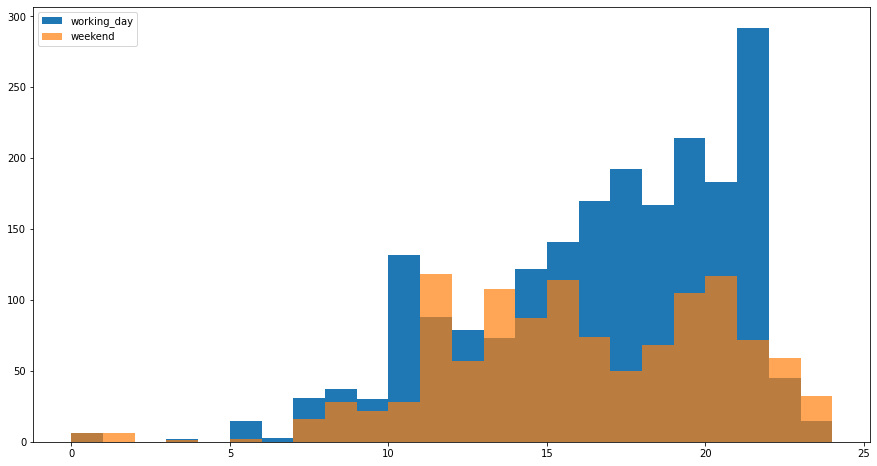

In [35]:
plt.figure(figsize=(15,8))

plt.hist(x=com_df.loc[com_df.dow == 'working_day']['hour'].tolist(),
         bins=range(0, 25),
        )

plt.hist(x=com_df.loc[com_df.dow == 'weekend']['hour'].tolist(),
         bins=range(0, 25),
         alpha=0.7
        )

plt.legend(['working_day', 'weekend'])
plt.plot()

## Disconnect database

In [36]:
conn.close()

## Are there hours when the total number of commits was higher on weekends than on working days?

Yes, most visible: 11, 13, 22, 23